In [79]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [92]:
#  Check robots.txt
robots_url = "https://finance.yahoo.com/robots.txt"
response = requests.get(robots_url)
robots_txt = response.text

if "Disallow: /crypto/" in robots_txt:
    print("Scraping from the /crypto/ section of Yahoo Finance is disallowed by robots.txt")
    exit()
else:
    print("Scraping from the /crypto/ section of Yahoo Finance is allowed by robots.txt")


Scraping from the /crypto/ section of Yahoo Finance is allowed by robots.txt


In [49]:
base_url = "https://finance.yahoo.com/crypto/?count=25&offset="
pages = 50
data_per_page = 25

symbol_list = []
name_list = []
price_list = []
change_list = []
percent_change_list = []
market_cap_list = []
volume_since_utc_list = []
volume_24hr_list = []
total_volume_24hr_list = []
circulating_supply_list = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}{(i-1)*data_per_page}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    # Find all tables on the page
    tables = parsed_content.find_all("table")

    # Loop through each table and extract data for up to 100 lines
    for table in tables:
        rows = table.find_all("tr")  # Find all table rows
        for row in rows[1:]:  # Skip the header row
            cells = row.find_all("td")  # Find all table cells
            symbol_list.append(cells[0].text.strip())
            name_list.append(cells[1].text.strip())
            price_list.append(cells[2].text.strip())
            change_list.append(cells[3].text.strip())
            percent_change_list.append(cells[4].text.strip())
            market_cap_list.append(cells[5].text.strip())
            volume_since_utc_list.append(cells[6].text.strip())
            volume_24hr_list.append(cells[7].text.strip())
            total_volume_24hr_list.append(cells[8].text.strip())
            circulating_supply_list.append(cells[9].text.strip())
            
    print(f"  ---> {len(symbol_list)} total data collected so far")






Scraping page 1
  ---> 25 total data collected so far
Scraping page 2
  ---> 50 total data collected so far
Scraping page 3
  ---> 75 total data collected so far
Scraping page 4
  ---> 100 total data collected so far
Scraping page 5
  ---> 125 total data collected so far
Scraping page 6
  ---> 150 total data collected so far
Scraping page 7
  ---> 175 total data collected so far
Scraping page 8
  ---> 200 total data collected so far
Scraping page 9
  ---> 225 total data collected so far
Scraping page 10
  ---> 250 total data collected so far
Scraping page 11
  ---> 275 total data collected so far
Scraping page 12
  ---> 300 total data collected so far
Scraping page 13
  ---> 325 total data collected so far
Scraping page 14
  ---> 350 total data collected so far
Scraping page 15
  ---> 375 total data collected so far
Scraping page 16
  ---> 400 total data collected so far
Scraping page 17
  ---> 425 total data collected so far
Scraping page 18
  ---> 450 total data collected so far
Scra

In [50]:
# Create a DataFrame from the scraped data
df = pd.DataFrame({
    "Symbol": symbol_list,
    "Name": name_list,
    "Price (Intraday)": price_list,
    "Change": change_list,
    "% Change": percent_change_list,
    "Market Cap": market_cap_list,
    "Volume in Currency (Since 0:00 UTC)": volume_since_utc_list,
    "Volume in Currency (24Hr)": volume_24hr_list,
    "Total Volume All Currencies (24Hr)": total_volume_24hr_list,
    "Circulating Supply": circulating_supply_list
})


# After looping through all pages, you'll have data scraped from each table
print(f"\nTotal data scraped: {len(df)}")

# Display the DataFrame
print(df)


Total data scraped: 1250
        Symbol                   Name Price (Intraday)   Change % Change  \
0      BTC-USD            Bitcoin USD        58,256.19  +935.22   +1.63%   
1      ETH-USD           Ethereum USD         2,964.58   +74.19   +2.57%   
2     USDT-USD        Tether USDt USD           1.0003  +0.0012   +0.12%   
3      BNB-USD                BNB USD           557.71    +9.14   +1.67%   
4      SOL-USD             Solana USD           136.04   +12.76  +10.35%   
...        ...                    ...              ...      ...      ...   
1245  NEAR-USD      NEAR Protocol USD           6.0153  -0.0307   -0.51%   
1246   ICP-USD  Internet Computer USD            13.31    +0.40   +3.10%   
1247   LTC-USD           Litecoin USD            79.70    +2.66   +3.46%   
1248   LEO-USD       UNUS SED LEO USD           5.8596  +0.0421   +0.72%   
1249   DAI-USD                Dai USD           1.0003  +0.0003   +0.03%   

     Market Cap Volume in Currency (Since 0:00 UTC) Volume in

In [51]:

df.head()

,Symbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply
0,BTC-USD,Bitcoin USD,"58,256.19",+935.22,+1.63%,1.147T,40.626B,40.626B,40.626B,19.693M
1,ETH-USD,Ethereum USD,"2,964.58",+74.19,+2.57%,356.021B,16.836B,16.836B,16.836B,120.092M
2,USDT-USD,Tether USDt USD,1.0003,+0.0012,+0.12%,110.628B,65.705B,65.705B,65.705B,110.596B
3,BNB-USD,BNB USD,557.71,+9.14,+1.67%,82.312B,1.118B,1.118B,1.118B,147.588M
4,SOL-USD,Solana USD,136.04,+12.76,+10.35%,60.84B,4.143B,4.143B,4.143B,447.222M
5,USDC-USD,USD Coin USD,1.0004,+0.0005,+0.05%,33.09B,8.231B,8.231B,8.231B,33.076B
6,XRP-USD,XRP USD,0.513683,+0.018180,+3.67%,28.437B,1.4B,1.4B,1.4B,55.359B
7,STETH-USD,Lido Staked ETH USD,"2,964.98",+70.12,+2.42%,27.683B,144.901M,144.901M,144.901M,9.337M
8,DOGE-USD,Dogecoin USD,0.129625,+0.005087,+4.08%,18.682B,1.794B,1.794B,1.794B,144.126B
9,TON11419-USD,Toncoin USD,4.7945,+0.0575,+1.21%,16.651B,198.047M,198.047M,198.047M,3.473B


,Symbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply
0,BTC-USD,Bitcoin USD,"58,256.19",+935.22,+1.63%,1.147T,40.626B,40.626B,40.626B,19.693M
1,ETH-USD,Ethereum USD,"2,964.58",+74.19,+2.57%,356.021B,16.836B,16.836B,16.836B,120.092M
2,USDT-USD,Tether USDt USD,1.0003,+0.0012,+0.12%,110.628B,65.705B,65.705B,65.705B,110.596B
3,BNB-USD,BNB USD,557.71,+9.14,+1.67%,82.312B,1.118B,1.118B,1.118B,147.588M
4,SOL-USD,Solana USD,136.04,+12.76,+10.35%,60.84B,4.143B,4.143B,4.143B,447.222M


In [52]:
def convert_volume(volume_str):
    # Remove commas from the string
    volume_str = volume_str.replace(',', '')
    
    if volume_str[-1] == 'T':
        return float(volume_str[:-1]) * 1e12  # Convert trillion to numeric
    elif volume_str[-1] == 'B':
        return float(volume_str[:-1]) * 1e9   # Convert billion to numeric
    elif volume_str[-1] == 'M':
        return float(volume_str[:-1]) * 1e6   # Convert million to numeric
    else:
        return float(volume_str)              # No suffix, return as is


# Convert each column to numeric
# Convert the column to strings
df['Volume in Currency (Since 0:00 UTC)'] = df['Volume in Currency (Since 0:00 UTC)'].astype(str)

# Apply the conversion function
df['Volume in Currency (Since 0:00 UTC)'] = df['Volume in Currency (Since 0:00 UTC)'].apply(convert_volume)

# Convert back to floats
df['Volume in Currency (Since 0:00 UTC)'] = df['Volume in Currency (Since 0:00 UTC)'].astype(float)

df['Volume in Currency (24Hr)'] = df['Volume in Currency (24Hr)'].astype(str)
df['Volume in Currency (24Hr)'] = df['Volume in Currency (24Hr)'].apply(convert_volume)
df['Volume in Currency (24Hr)'] = df['Volume in Currency (24Hr)'].astype(float)

df['Total Volume All Currencies (24Hr)'] = df['Total Volume All Currencies (24Hr)'].astype(str)
df['Total Volume All Currencies (24Hr)'] = df['Total Volume All Currencies (24Hr)'].apply(convert_volume)
df['Total Volume All Currencies (24Hr)'] = df['Total Volume All Currencies (24Hr)'].astype(float)

df['Circulating Supply'] = df['Circulating Supply'].astype(str)
df['Circulating Supply'] = df['Circulating Supply'].apply(convert_volume)
df['Circulating Supply'] = df['Circulating Supply'].astype(float)


df['Market Cap'] = df['Market Cap'].astype(str)
df['Market Cap'] = df['Market Cap'].apply(convert_volume)
df['Market Cap'] = df['Market Cap'].astype(float)
	

In [53]:
df

,Symbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply
0,BTC-USD,Bitcoin USD,"58,256.19",+935.22,+1.63%,1.147000e+12,4.062600e+10,4.062600e+10,4.062600e+10,1.969300e+07
1,ETH-USD,Ethereum USD,"2,964.58",+74.19,+2.57%,3.560210e+11,1.683600e+10,1.683600e+10,1.683600e+10,1.200920e+08
2,USDT-USD,Tether USDt USD,1.0003,+0.0012,+0.12%,1.106280e+11,6.570500e+10,6.570500e+10,6.570500e+10,1.105960e+11
3,BNB-USD,BNB USD,557.71,+9.14,+1.67%,8.231200e+10,1.118000e+09,1.118000e+09,1.118000e+09,1.475880e+08
4,SOL-USD,Solana USD,136.04,+12.76,+10.35%,6.084000e+10,4.143000e+09,4.143000e+09,4.143000e+09,4.472220e+08
...,...,...,...,...,...,...,...,...,...,...
1245,NEAR-USD,NEAR Protocol USD,6.0153,-0.0307,-0.51%,6.424000e+09,5.104870e+08,5.104870e+08,5.104870e+08,1.068000e+09
1246,ICP-USD,Internet Computer USD,13.31,+0.40,+3.10%,6.169000e+09,1.592240e+08,1.592240e+08,1.592240e+08,4.633390e+08
1247,LTC-USD,Litecoin USD,79.70,+2.66,+3.46%,5.937000e+09,3.637410e+08,3.637410e+08,3.637410e+08,7.448700e+07
1248,LEO-USD,UNUS SED LEO USD,5.8596,+0.0421,+0.72%,5.429000e+09,1.425000e+06,1.425000e+06,1.425000e+06,9.265040e+08


In [54]:
import pandas as pd

# Assuming df is your DataFrame containing the cryptocurrency data
# Let's convert the 'Change' column to numeric first
df['Change'] = pd.to_numeric(df['Change'].replace('%', '', regex=True))

# Calculate price change statistics
price_change_stats = df['Change'].describe()

# Display the statistics
print("Price Change Statistics:")
print(price_change_stats)


Price Change Statistics:
count    1250.000000
mean       82.123555
std       252.026419
min        -0.030700
25%         0.003301
50%         0.057500
75%         9.140000
max       935.220000
Name: Change, dtype: float64


In [55]:

# Calculate total market capitalization
total_market_cap = df['Market Cap'].sum()

# Calculate market cap weighting
df['Market Cap Weight'] = df['Market Cap'] / total_market_cap

# Display the DataFrame with market cap weighting
print("DataFrame with market cap weighting:")
print(df[['Symbol', 'Name', 'Market Cap', 'Market Cap Weight']])




DataFrame with market cap weighting:
        Symbol                   Name    Market Cap  Market Cap Weight
0      BTC-USD            Bitcoin USD  1.147000e+12           0.011377
1      ETH-USD           Ethereum USD  3.560210e+11           0.003531
2     USDT-USD        Tether USDt USD  1.106280e+11           0.001097
3      BNB-USD                BNB USD  8.231200e+10           0.000816
4      SOL-USD             Solana USD  6.084000e+10           0.000603
...        ...                    ...           ...                ...
1245  NEAR-USD      NEAR Protocol USD  6.424000e+09           0.000064
1246   ICP-USD  Internet Computer USD  6.169000e+09           0.000061
1247   LTC-USD           Litecoin USD  5.937000e+09           0.000059
1248   LEO-USD       UNUS SED LEO USD  5.429000e+09           0.000054
1249   DAI-USD                Dai USD  5.349000e+09           0.000053

[1250 rows x 4 columns]


In [56]:
df

,Symbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,Market Cap Weight
0,BTC-USD,Bitcoin USD,"58,256.19",935.2200,+1.63%,1.147000e+12,4.062600e+10,4.062600e+10,4.062600e+10,1.969300e+07,0.011377
1,ETH-USD,Ethereum USD,"2,964.58",74.1900,+2.57%,3.560210e+11,1.683600e+10,1.683600e+10,1.683600e+10,1.200920e+08,0.003531
2,USDT-USD,Tether USDt USD,1.0003,0.0012,+0.12%,1.106280e+11,6.570500e+10,6.570500e+10,6.570500e+10,1.105960e+11,0.001097
3,BNB-USD,BNB USD,557.71,9.1400,+1.67%,8.231200e+10,1.118000e+09,1.118000e+09,1.118000e+09,1.475880e+08,0.000816
4,SOL-USD,Solana USD,136.04,12.7600,+10.35%,6.084000e+10,4.143000e+09,4.143000e+09,4.143000e+09,4.472220e+08,0.000603
...,...,...,...,...,...,...,...,...,...,...,...
1245,NEAR-USD,NEAR Protocol USD,6.0153,-0.0307,-0.51%,6.424000e+09,5.104870e+08,5.104870e+08,5.104870e+08,1.068000e+09,0.000064
1246,ICP-USD,Internet Computer USD,13.31,0.4000,+3.10%,6.169000e+09,1.592240e+08,1.592240e+08,1.592240e+08,4.633390e+08,0.000061
1247,LTC-USD,Litecoin USD,79.70,2.6600,+3.46%,5.937000e+09,3.637410e+08,3.637410e+08,3.637410e+08,7.448700e+07,0.000059
1248,LEO-USD,UNUS SED LEO USD,5.8596,0.0421,+0.72%,5.429000e+09,1.425000e+06,1.425000e+06,1.425000e+06,9.265040e+08,0.000054


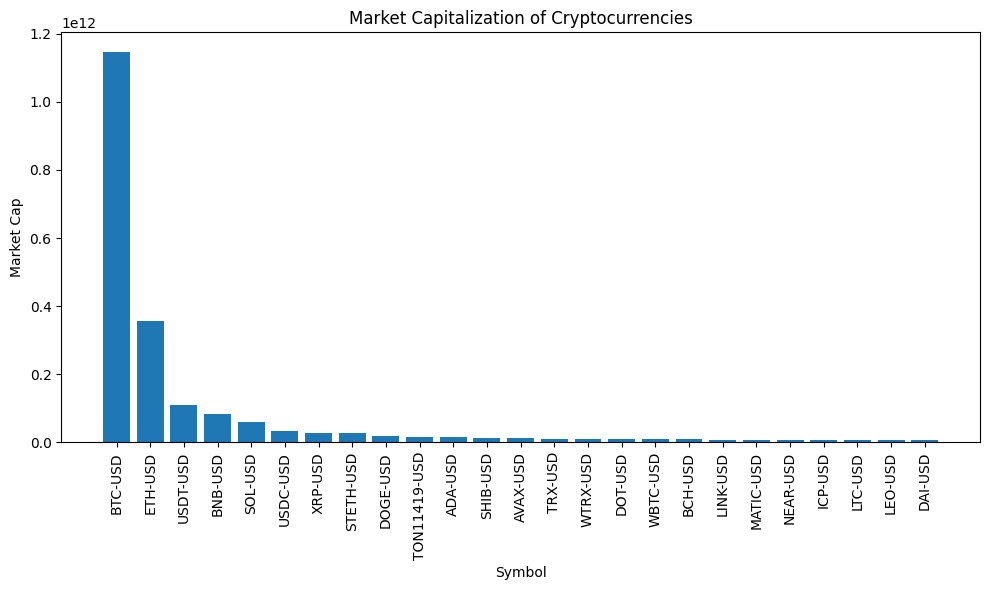

In [57]:
import matplotlib.pyplot as plt

# Sort DataFrame by Market Cap
df_sorted = df.sort_values(by='Market Cap', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Symbol'], df_sorted['Market Cap'])
plt.xlabel('Symbol')
plt.ylabel('Market Cap')
plt.title('Market Capitalization of Cryptocurrencies')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


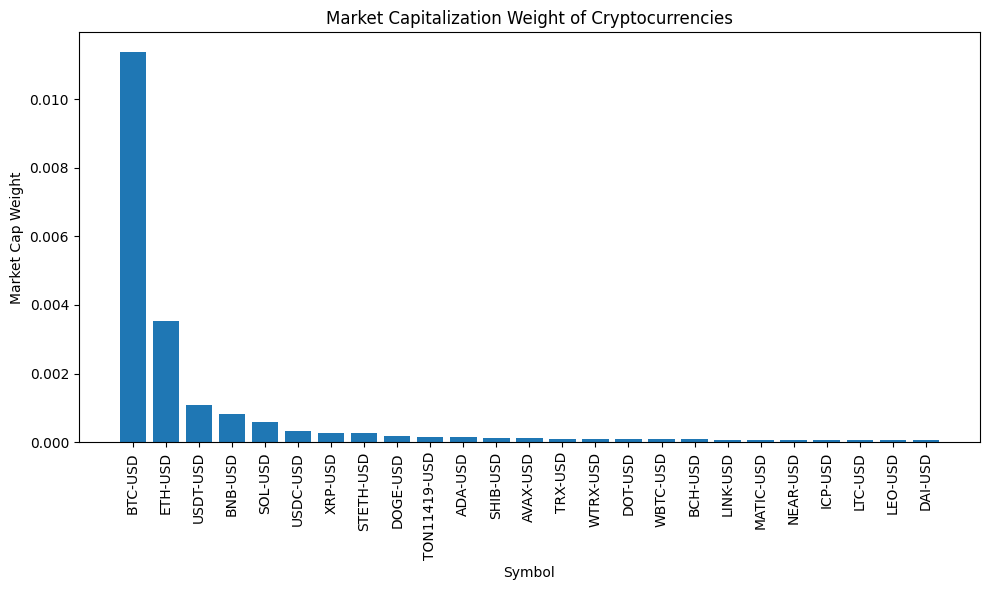

In [58]:
import matplotlib.pyplot as plt

# Sort DataFrame by Market Cap Weight
df_sorted = df.sort_values(by='Market Cap Weight', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Symbol'], df_sorted['Market Cap Weight'])
plt.xlabel('Symbol')
plt.ylabel('Market Cap Weight')
plt.title('Market Capitalization Weight of Cryptocurrencies')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



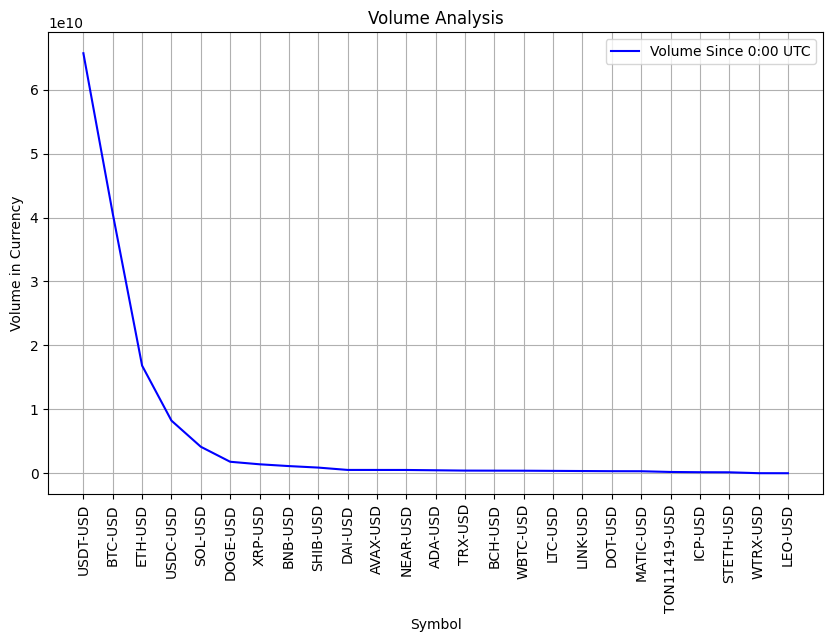

In [59]:
import matplotlib.pyplot as plt

df_sorted = df.sort_values(by='Volume in Currency (Since 0:00 UTC)', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Symbol'], df_sorted['Volume in Currency (Since 0:00 UTC)'], label='Volume Since 0:00 UTC', color='blue')
plt.xlabel('Symbol')
plt.ylabel('Volume in Currency')
plt.title('Volume Analysis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()


In [60]:
df

,Symbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,Market Cap Weight
0,BTC-USD,Bitcoin USD,"58,256.19",935.2200,+1.63%,1.147000e+12,4.062600e+10,4.062600e+10,4.062600e+10,1.969300e+07,0.011377
1,ETH-USD,Ethereum USD,"2,964.58",74.1900,+2.57%,3.560210e+11,1.683600e+10,1.683600e+10,1.683600e+10,1.200920e+08,0.003531
2,USDT-USD,Tether USDt USD,1.0003,0.0012,+0.12%,1.106280e+11,6.570500e+10,6.570500e+10,6.570500e+10,1.105960e+11,0.001097
3,BNB-USD,BNB USD,557.71,9.1400,+1.67%,8.231200e+10,1.118000e+09,1.118000e+09,1.118000e+09,1.475880e+08,0.000816
4,SOL-USD,Solana USD,136.04,12.7600,+10.35%,6.084000e+10,4.143000e+09,4.143000e+09,4.143000e+09,4.472220e+08,0.000603
...,...,...,...,...,...,...,...,...,...,...,...
1245,NEAR-USD,NEAR Protocol USD,6.0153,-0.0307,-0.51%,6.424000e+09,5.104870e+08,5.104870e+08,5.104870e+08,1.068000e+09,0.000064
1246,ICP-USD,Internet Computer USD,13.31,0.4000,+3.10%,6.169000e+09,1.592240e+08,1.592240e+08,1.592240e+08,4.633390e+08,0.000061
1247,LTC-USD,Litecoin USD,79.70,2.6600,+3.46%,5.937000e+09,3.637410e+08,3.637410e+08,3.637410e+08,7.448700e+07,0.000059
1248,LEO-USD,UNUS SED LEO USD,5.8596,0.0421,+0.72%,5.429000e+09,1.425000e+06,1.425000e+06,1.425000e+06,9.265040e+08,0.000054


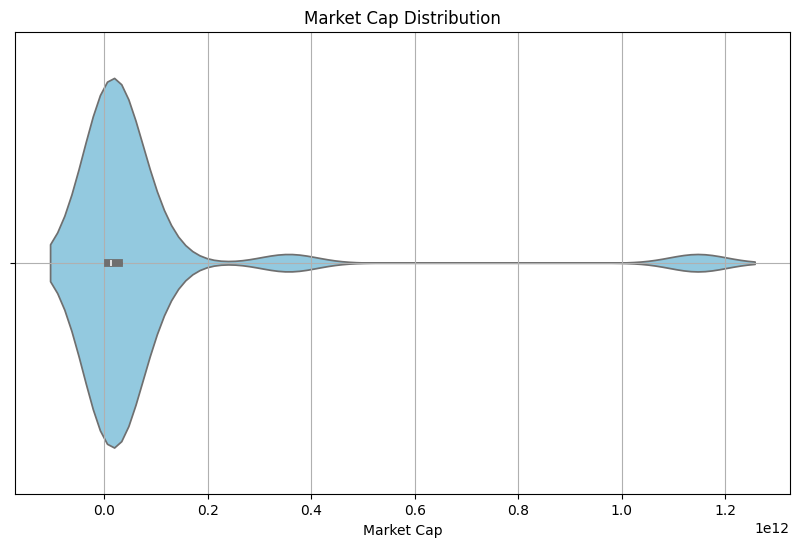

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Market Cap'], color='skyblue')
plt.xlabel('Market Cap')
plt.title('Market Cap Distribution')
plt.grid(True)
plt.show()


In [62]:
# Ensure all values in 'Price (Intraday)' column are strings
df['Price (Intraday)'] = df['Price (Intraday)'].astype(str)

# Remove commas from the 'Price (Intraday)' column and convert to numeric
df['Price (Intraday)'] = pd.to_numeric(df['Price (Intraday)'].str.replace(',', ''))

def calculate_rsi(prices, window=14):
    # Calculate price changes
    delta = prices.diff()
    
    # Separate gains and losses
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    # Calculate average gains and losses over the window
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    # Calculate relative strength (RS)
    rs = avg_gain / avg_loss
    
    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Calculate RSI for each cryptocurrency
df['RSI'] = calculate_rsi(df['Price (Intraday)'])

# Display the DataFrame with RSI values
print(df[['Symbol', 'Name', 'RSI']])


        Symbol                   Name        RSI
0      BTC-USD            Bitcoin USD        NaN
1      ETH-USD           Ethereum USD   0.000000
2     USDT-USD        Tether USDt USD   0.000000
3      BNB-USD                BNB USD   0.946594
4      SOL-USD             Solana USD   0.939855
...        ...                    ...        ...
1245  NEAR-USD      NEAR Protocol USD  50.002236
1246   ICP-USD  Internet Computer USD  48.770950
1247   LTC-USD           Litecoin USD  50.033952
1248   LEO-USD       UNUS SED LEO USD  50.000454
1249   DAI-USD                Dai USD  50.000234

[1250 rows x 3 columns]


In [63]:
df

,Symbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,Market Cap Weight,RSI
0,BTC-USD,Bitcoin USD,58256.1900,935.2200,+1.63%,1.147000e+12,4.062600e+10,4.062600e+10,4.062600e+10,1.969300e+07,0.011377,NaN
1,ETH-USD,Ethereum USD,2964.5800,74.1900,+2.57%,3.560210e+11,1.683600e+10,1.683600e+10,1.683600e+10,1.200920e+08,0.003531,0.000000
2,USDT-USD,Tether USDt USD,1.0003,0.0012,+0.12%,1.106280e+11,6.570500e+10,6.570500e+10,6.570500e+10,1.105960e+11,0.001097,0.000000
3,BNB-USD,BNB USD,557.7100,9.1400,+1.67%,8.231200e+10,1.118000e+09,1.118000e+09,1.118000e+09,1.475880e+08,0.000816,0.946594
4,SOL-USD,Solana USD,136.0400,12.7600,+10.35%,6.084000e+10,4.143000e+09,4.143000e+09,4.143000e+09,4.472220e+08,0.000603,0.939855
...,...,...,...,...,...,...,...,...,...,...,...,...
1245,NEAR-USD,NEAR Protocol USD,6.0153,-0.0307,-0.51%,6.424000e+09,5.104870e+08,5.104870e+08,5.104870e+08,1.068000e+09,0.000064,50.002236
1246,ICP-USD,Internet Computer USD,13.3100,0.4000,+3.10%,6.169000e+09,1.592240e+08,1.592240e+08,1.592240e+08,4.633390e+08,0.000061,48.770950
1247,LTC-USD,Litecoin USD,79.7000,2.6600,+3.46%,5.937000e+09,3.637410e+08,3.637410e+08,3.637410e+08,7.448700e+07,0.000059,50.033952
1248,LEO-USD,UNUS SED LEO USD,5.8596,0.0421,+0.72%,5.429000e+09,1.425000e+06,1.425000e+06,1.425000e+06,9.265040e+08,0.000054,50.000454


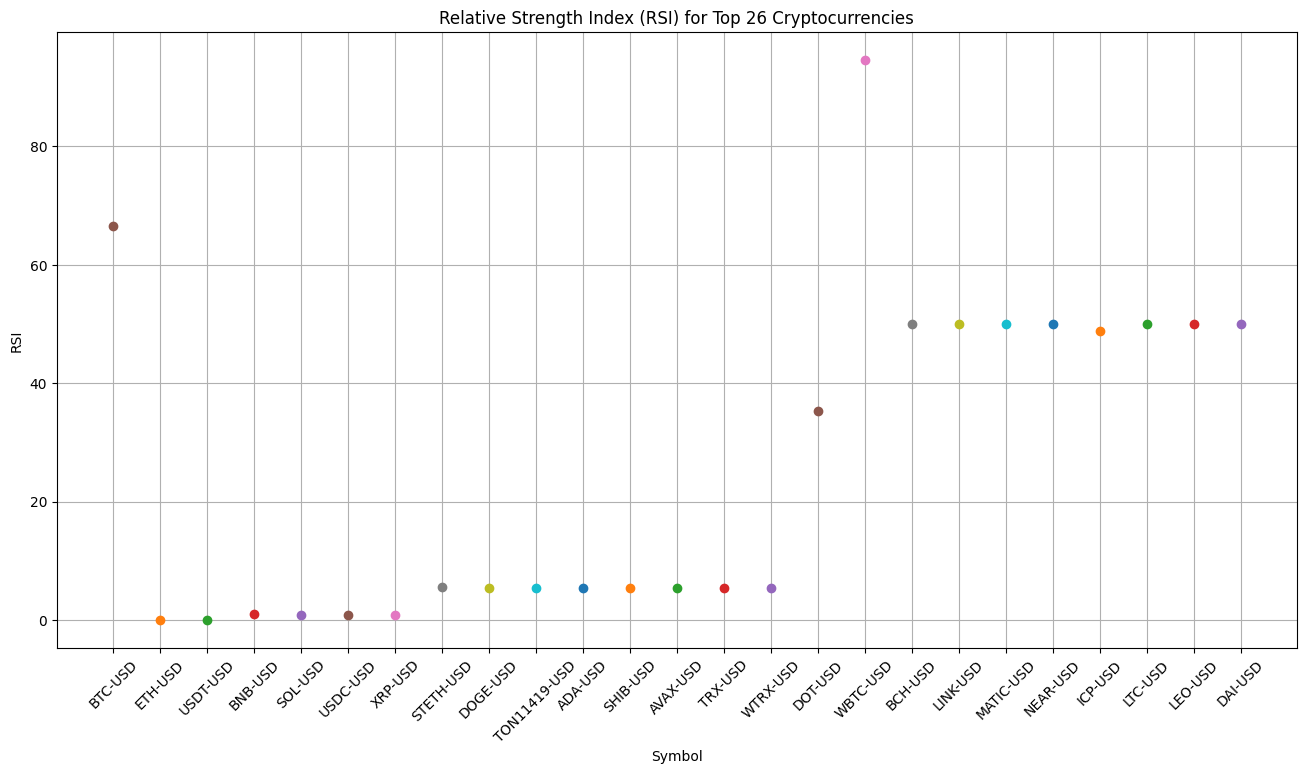

In [64]:
import matplotlib.pyplot as plt

# Select the top 26 cryptocurrencies
top_26 = df.head(26)

# Plot RSI for the top 26 cryptocurrencies
plt.figure(figsize=(16, 8))
for symbol, rsi in zip(top_26['Symbol'], top_26['RSI']):
    plt.plot(symbol, rsi, marker='o', label=symbol)

plt.title('Relative Strength Index (RSI) for Top 26 Cryptocurrencies')
plt.xlabel('Symbol')
plt.ylabel('RSI')
plt.xticks(rotation=45)

plt.grid(True)
plt.show()

In [65]:

# Convert 'Price (Intraday)' and 'Total Volume All Currencies (24Hr)' columns to numeric
df['Price (Intraday)'] = pd.to_numeric(df['Price (Intraday)'], errors='coerce')
df['Total Volume All Currencies (24Hr)'] = pd.to_numeric(df['Total Volume All Currencies (24Hr)'], errors='coerce')

# Drop rows with NaN values
df.dropna(subset=['Price (Intraday)', 'Total Volume All Currencies (24Hr)'], inplace=True)

# Calculate VWAP for each cryptocurrency
df['VWAP'] = df['Price (Intraday)'] * df['Total Volume All Currencies (24Hr)']

# Display the DataFrame with VWAP values
print(df[['Symbol', 'Name', 'VWAP']])


        Symbol                   Name          VWAP
0      BTC-USD            Bitcoin USD  2.366716e+15
1      ETH-USD           Ethereum USD  4.991167e+13
2     USDT-USD        Tether USDt USD  6.572471e+10
3      BNB-USD                BNB USD  6.235198e+11
4      SOL-USD             Solana USD  5.636137e+11
...        ...                    ...           ...
1245  NEAR-USD      NEAR Protocol USD  3.070732e+09
1246   ICP-USD  Internet Computer USD  2.119271e+09
1247   LTC-USD           Litecoin USD  2.899016e+10
1248   LEO-USD       UNUS SED LEO USD  8.349930e+06
1249   DAI-USD                Dai USD  5.168860e+08

[1250 rows x 3 columns]


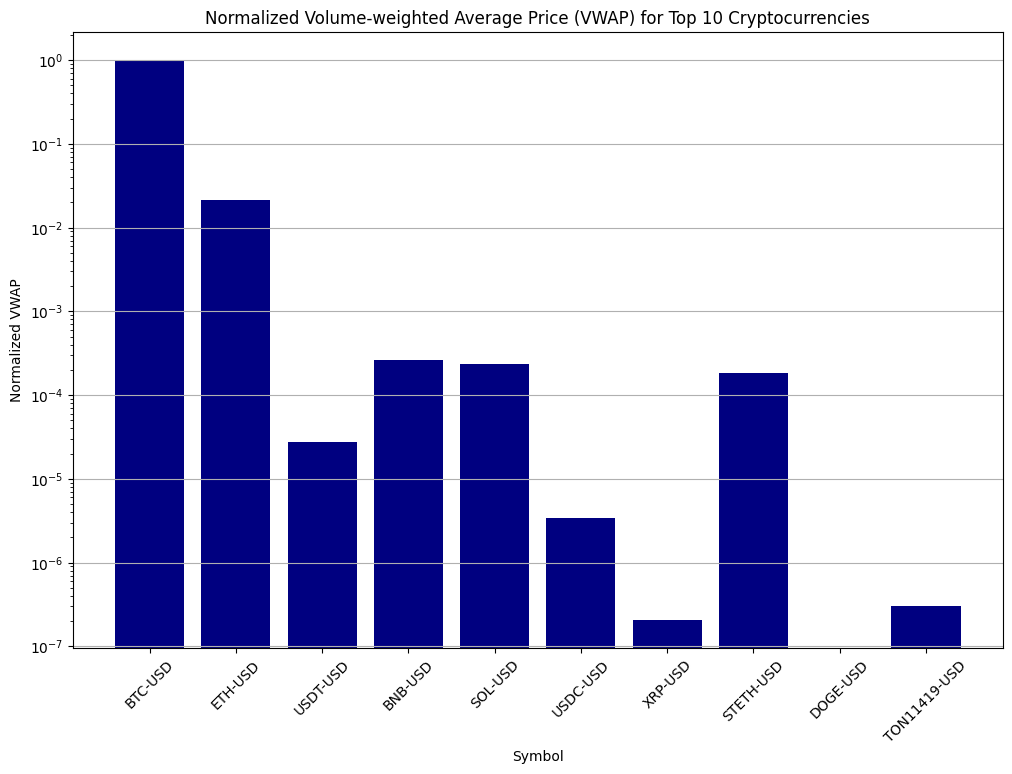

In [66]:
import matplotlib.pyplot as plt

# Select the top 10 cryptocurrencies
top_10 = df.head(10)

# Normalize VWAP values
max_vwap = top_10['VWAP'].max()
min_vwap = top_10['VWAP'].min()

# Create a copy of the DataFrame
top_10_copy = top_10.copy()

# Modify the copy to avoid SettingWithCopyWarning
top_10_copy.loc[:, 'Normalized VWAP'] = (top_10['VWAP'] - min_vwap) / (max_vwap - min_vwap)

# Plot normalized VWAP for the top 10 cryptocurrencies with a logarithmic scale
plt.figure(figsize=(12, 8))
plt.bar(top_10_copy['Symbol'], top_10_copy['Normalized VWAP'], color='navy')
plt.title('Normalized Volume-weighted Average Price (VWAP) for Top 10 Cryptocurrencies')
plt.xlabel('Symbol')
plt.ylabel('Normalized VWAP')
plt.xticks(rotation=45)
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.grid(axis='y')
plt.show()


In [71]:
import pandas as pd

# Assuming df is your DataFrame containing the cryptocurrency data

# Convert 'Market Cap' and 'Volume in Currency (24Hr)' columns to numeric, handling errors by coercing invalid parsing to NaN
df['Market Cap'] = pd.to_numeric(df['Market Cap'], errors='coerce')
df['Volume in Currency (24Hr)'] = pd.to_numeric(df['Volume in Currency (24Hr)'], errors='coerce')

# Drop rows with NaN values in 'Market Cap' and 'Volume in Currency (24Hr)' columns
df.dropna(subset=['Market Cap', 'Volume in Currency (24Hr)'], inplace=True)

# Calculate Market Cap to Volume Ratio
df['Market Cap to Volume Ratio'] = df['Market Cap'] / df['Volume in Currency (24Hr)']

# Display the DataFrame with Market Cap to Volume Ratio
print(df[['Symbol', 'Name', 'Market Cap to Volume Ratio']])


        Symbol                   Name  Market Cap to Volume Ratio
0      BTC-USD            Bitcoin USD                   28.233151
1      ETH-USD           Ethereum USD                   21.146412
2     USDT-USD        Tether USDt USD                    1.683707
3      BNB-USD                BNB USD                   73.624329
4      SOL-USD             Solana USD                   14.685011
...        ...                    ...                         ...
1245  NEAR-USD      NEAR Protocol USD                   12.584062
1246   ICP-USD  Internet Computer USD                   38.744159
1247   LTC-USD           Litecoin USD                   16.322053
1248   LEO-USD       UNUS SED LEO USD                 3809.824561
1249   DAI-USD                Dai USD                   10.351614

[1250 rows x 3 columns]


In [72]:
df

,Symbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,Market Cap Weight,RSI,VWAP,Market Cap to Volume Ratio
0,BTC-USD,Bitcoin USD,58256.1900,935.2200,+1.63%,1.147000e+12,4.062600e+10,4.062600e+10,4.062600e+10,1.969300e+07,0.011377,NaN,2.366716e+15,28.233151
1,ETH-USD,Ethereum USD,2964.5800,74.1900,+2.57%,3.560210e+11,1.683600e+10,1.683600e+10,1.683600e+10,1.200920e+08,0.003531,0.000000,4.991167e+13,21.146412
2,USDT-USD,Tether USDt USD,1.0003,0.0012,+0.12%,1.106280e+11,6.570500e+10,6.570500e+10,6.570500e+10,1.105960e+11,0.001097,0.000000,6.572471e+10,1.683707
3,BNB-USD,BNB USD,557.7100,9.1400,+1.67%,8.231200e+10,1.118000e+09,1.118000e+09,1.118000e+09,1.475880e+08,0.000816,0.946594,6.235198e+11,73.624329
4,SOL-USD,Solana USD,136.0400,12.7600,+10.35%,6.084000e+10,4.143000e+09,4.143000e+09,4.143000e+09,4.472220e+08,0.000603,0.939855,5.636137e+11,14.685011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,NEAR-USD,NEAR Protocol USD,6.0153,-0.0307,-0.51%,6.424000e+09,5.104870e+08,5.104870e+08,5.104870e+08,1.068000e+09,0.000064,50.002236,3.070732e+09,12.584062
1246,ICP-USD,Internet Computer USD,13.3100,0.4000,+3.10%,6.169000e+09,1.592240e+08,1.592240e+08,1.592240e+08,4.633390e+08,0.000061,48.770950,2.119271e+09,38.744159
1247,LTC-USD,Litecoin USD,79.7000,2.6600,+3.46%,5.937000e+09,3.637410e+08,3.637410e+08,3.637410e+08,7.448700e+07,0.000059,50.033952,2.899016e+10,16.322053
1248,LEO-USD,UNUS SED LEO USD,5.8596,0.0421,+0.72%,5.429000e+09,1.425000e+06,1.425000e+06,1.425000e+06,9.265040e+08,0.000054,50.000454,8.349930e+06,3809.824561


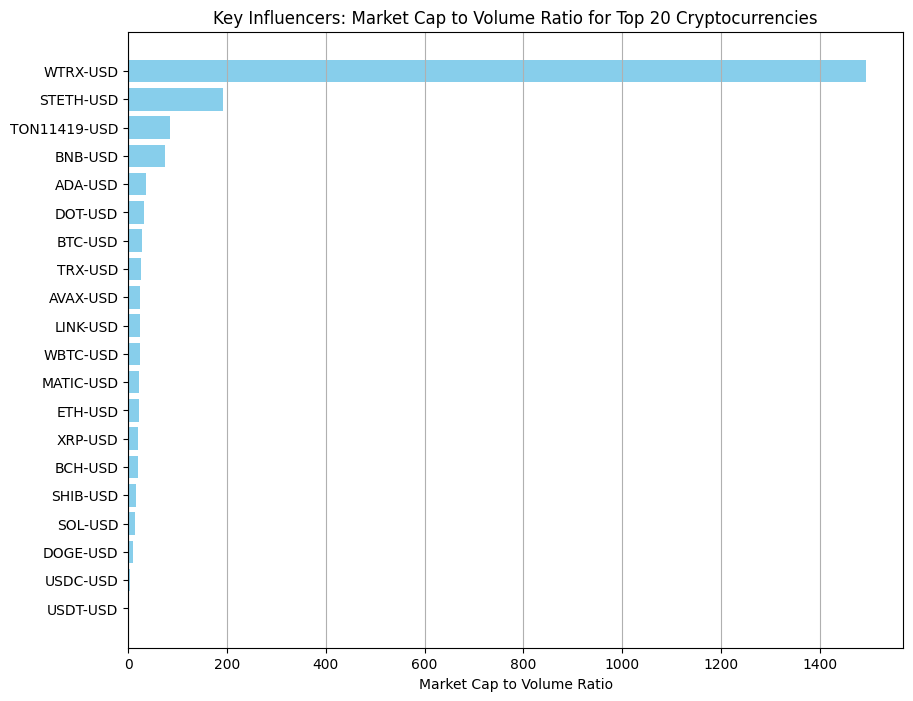

In [73]:
import matplotlib.pyplot as plt

# Select the top 20 cryptocurrencies
top_20 = df.head(20)

# Sort the top 20 cryptocurrencies by Market Cap to Volume Ratio in descending order
top_20_sorted = top_20.sort_values(by='Market Cap to Volume Ratio', ascending=False)

# Plot key influencers diagram for the top 20 cryptocurrencies
plt.figure(figsize=(10, 8))
plt.barh(top_20_sorted['Symbol'], top_20_sorted['Market Cap to Volume Ratio'], color='skyblue')
plt.xlabel('Market Cap to Volume Ratio')
plt.title('Key Influencers: Market Cap to Volume Ratio for Top 20 Cryptocurrencies')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest ratio at the top
plt.grid(axis='x')  # Add gridlines for better readability
plt.show()


In [74]:
df

,Symbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,Market Cap Weight,RSI,VWAP,Market Cap to Volume Ratio
0,BTC-USD,Bitcoin USD,58256.1900,935.2200,+1.63%,1.147000e+12,4.062600e+10,4.062600e+10,4.062600e+10,1.969300e+07,0.011377,NaN,2.366716e+15,28.233151
1,ETH-USD,Ethereum USD,2964.5800,74.1900,+2.57%,3.560210e+11,1.683600e+10,1.683600e+10,1.683600e+10,1.200920e+08,0.003531,0.000000,4.991167e+13,21.146412
2,USDT-USD,Tether USDt USD,1.0003,0.0012,+0.12%,1.106280e+11,6.570500e+10,6.570500e+10,6.570500e+10,1.105960e+11,0.001097,0.000000,6.572471e+10,1.683707
3,BNB-USD,BNB USD,557.7100,9.1400,+1.67%,8.231200e+10,1.118000e+09,1.118000e+09,1.118000e+09,1.475880e+08,0.000816,0.946594,6.235198e+11,73.624329
4,SOL-USD,Solana USD,136.0400,12.7600,+10.35%,6.084000e+10,4.143000e+09,4.143000e+09,4.143000e+09,4.472220e+08,0.000603,0.939855,5.636137e+11,14.685011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,NEAR-USD,NEAR Protocol USD,6.0153,-0.0307,-0.51%,6.424000e+09,5.104870e+08,5.104870e+08,5.104870e+08,1.068000e+09,0.000064,50.002236,3.070732e+09,12.584062
1246,ICP-USD,Internet Computer USD,13.3100,0.4000,+3.10%,6.169000e+09,1.592240e+08,1.592240e+08,1.592240e+08,4.633390e+08,0.000061,48.770950,2.119271e+09,38.744159
1247,LTC-USD,Litecoin USD,79.7000,2.6600,+3.46%,5.937000e+09,3.637410e+08,3.637410e+08,3.637410e+08,7.448700e+07,0.000059,50.033952,2.899016e+10,16.322053
1248,LEO-USD,UNUS SED LEO USD,5.8596,0.0421,+0.72%,5.429000e+09,1.425000e+06,1.425000e+06,1.425000e+06,9.265040e+08,0.000054,50.000454,8.349930e+06,3809.824561


In [76]:
# Specify the file path where you want to save the Excel file
file_path = 'C:/Users/PAVILION/Desktop/AI/crypto_data_.xlsx'

# Export the DataFrame to an Excel file
df.to_excel(file_path, index=False)

print("DataFrame successfully exported to Excel file:", file_path)

DataFrame successfully exported to Excel file: C:/Users/PAVILION/Desktop/AI/crypto_data_.xlsx
